## Librerias

In [1]:
import pandas as pd
import numpy as np
import urllib.request
from PIL import Image

## Data

In [2]:
# Cargar el conjunto de datos de entrenamiento
train_df = pd.read_csv('./data/train.csv', index_col=0)


## Data exploration

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [4]:
# Mostrar las primeras filas para entender la estructura de los datos
train_df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
laptop_ID,,,,,,,,,,,,
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [16]:
#train_df.head(20)

In [5]:
train_df.describe()

,Inches,Price_in_euros
count,912.000000,912.000000
mean,14.981579,1111.724090
std,1.436719,687.959172
min,10.100000,174.000000
25%,14.000000,589.000000
50%,15.600000,978.000000
75%,15.600000,1483.942500
max,18.400000,6099.000000


In [6]:
train_df.describe(include=['O'])

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,912,912,912,912,912,912,912,912,912,912
unique,19,480,6,36,107,9,37,93,9,165
top,Lenovo,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,202,23,509,349,124,434,282,185,741,91


## Data processing

El target es la columna `Price_in_euros`

In [3]:
# Limpiar y convertir las columnas "Ram" y "Weight" a formato numérico
# Remover 'GB' de Ram y convertir a entero
train_df['Ram'] = train_df['Ram'].str.replace('GB', '').astype(int)

# Remover 'kg' de Weight y convertir a flotante
train_df['Weight'] = train_df['Weight'].str.replace('kg', '').astype(float)

# Revisar los cambios realizados
train_df[['Ram', 'Weight']].head()


,Ram,Weight
laptop_ID,,
755,8,1.86
618,16,2.59
909,8,2.04
2,8,1.34
286,4,2.25


In [4]:
# Ingeniería de características simple para 'ScreenResolution'
# Esto podría ser tan simple como extraer si es Full HD o no, o podrías ir más allá y extraer dimensiones específicas
train_df['Full_HD'] = train_df['ScreenResolution'].apply(lambda x: 1 if '1920x1080' in x else 0)

# Similarmente, podríamos querer extraer información sobre el procesador, como la velocidad del procesador
import re
# Esto es un ejemplo simple que busca un patrón de GHz dentro de la cadena de CPU
train_df['Cpu_Speed_GHz'] = train_df['Cpu'].apply(lambda x: float(re.findall(r'(\d+\.\d+)GHz', x)[0]) if re.findall(r'(\d+\.\d+)GHz', x) else 0)


In [9]:
train_df[['Ram', 'Weight', 'Full_HD', 'Cpu_Speed_GHz']].head()

,Ram,Weight,Full_HD,Cpu_Speed_GHz
laptop_ID,,,,
755,8,1.86,1,0.0
618,16,2.59,1,2.6
909,8,2.04,1,2.7
2,8,1.34,0,1.8
286,4,2.25,1,2.0


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    int64  
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    float64
 11  Price_in_euros    912 non-null    float64
 12  Full_HD           912 non-null    int64  
 13  Cpu_Speed_GHz     912 non-null    float64
dtypes: float64(4), int64(2), object(8)
memory usage: 106.9+ KB


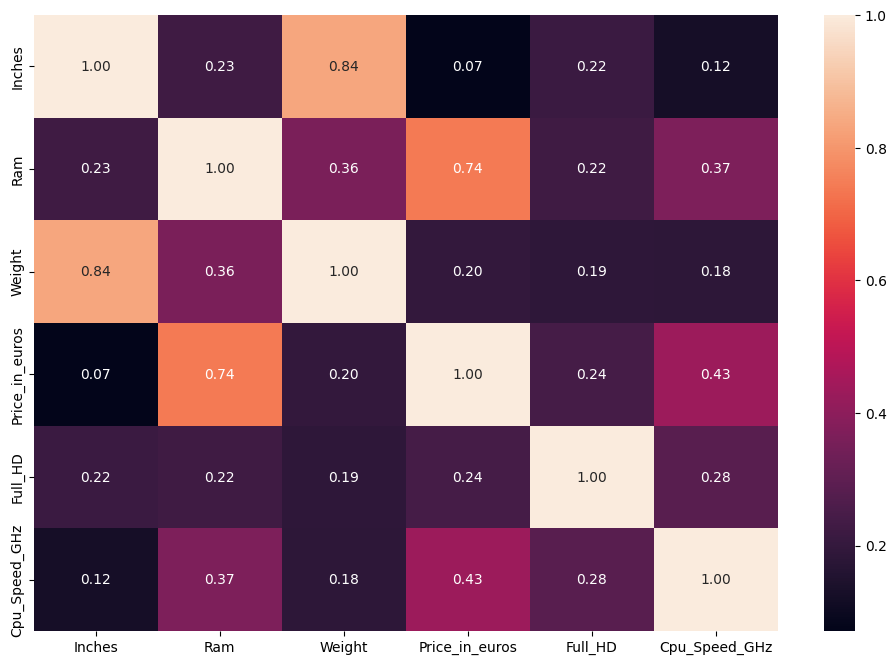

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo las columnas numéricas para calcular la matriz de correlación
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

# Calculamos la matriz de correlación solo para las variables numéricas
corr_matrix = numeric_df.corr()

# Dibujamos el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()



In [14]:
corr_matrix

,Inches,Ram,Weight,Price_in_euros,Full_HD,Cpu_Speed_GHz
Inches,1.000000,0.226420,0.836236,0.071043,0.215787,0.124074
Ram,0.226420,1.000000,0.359798,0.738922,0.224725,0.365429
Weight,0.836236,0.359798,1.000000,0.197086,0.185928,0.182431
Price_in_euros,0.071043,0.738922,0.197086,1.000000,0.238000,0.432717
Full_HD,0.215787,0.224725,0.185928,0.238000,1.000000,0.281834
Cpu_Speed_GHz,0.124074,0.365429,0.182431,0.432717,0.281834,1.000000


In [ ]:
'''
Ram tiene una fuerte correlación positiva con Price_in_euros, lo cual es lógico ya que más RAM suele significar un portátil más caro.
Weight tiene una correlación positiva baja con Price_in_euros, lo que podría indicar que portátiles más pesados no necesariamente son más caros.
Full_HD tiene una correlación positiva moderada con Price_in_euros, sugiriendo que los portátiles con pantallas Full HD tienden a ser más caros.
Cpu_Speed_GHz tiene una correlación moderada con Price_in_euros, lo cual es de esperar ya que procesadores más rápidos suelen encontrarse en portátiles de gama más alta.

Ram: Definitivamente deberíamos mantener la RAM como una característica en nuestro modelo, dado su fuerte correlación con el precio.
Full_HD: También parece ser un buen predictor, así que lo incluiremos en el modelo.
Cpu_Speed_GHz: A pesar de su correlación moderada, es una característica importante que puede afectar el rendimiento del portátil y, por lo tanto, su precio. Podríamos considerar extraer más detalles del CPU para mejorar la modelización.
TypeName y OpSys: Son categóricas y parecen influir en el precio, así que debemos codificarlas adecuadamente para incluirlas en el modelo. Podemos usar one-hot encoding para convertirlas en características numéricas.
Product, Memory, Gpu: Dada la alta cardinalidad de estas variables, necesitamos estrategias de ingeniería de características más sofisticadas. Podríamos considerar agrupar categorías similares, extraer características más generales o incluso usar técnicas de codificación de características categóricas como target encoding o embeddings.
'''

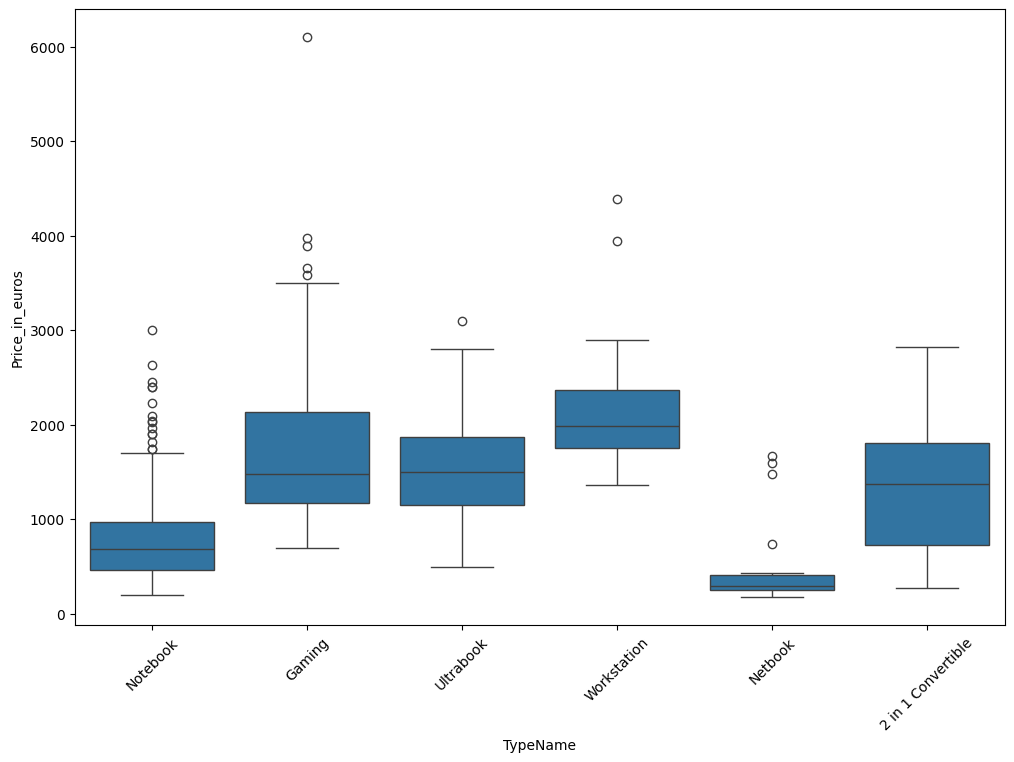

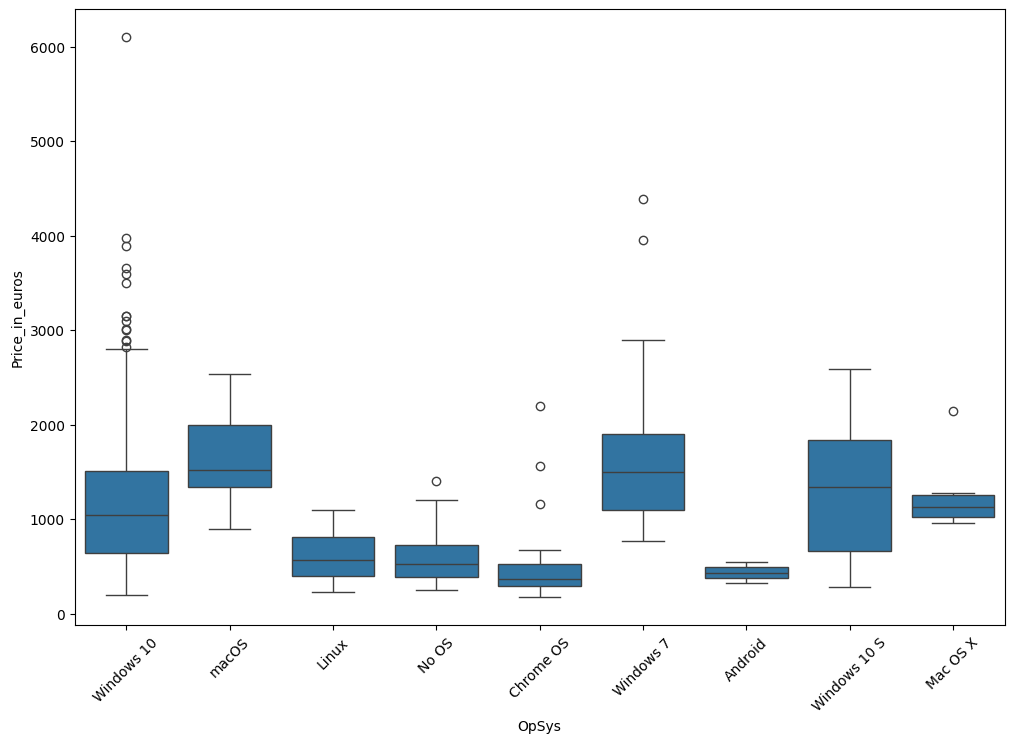

In [13]:
# Visualizamos la relación entre 'TypeName' y 'Price_in_euros'
plt.figure(figsize=(12, 8))
sns.boxplot(x='TypeName', y='Price_in_euros', data=train_df)
plt.xticks(rotation=45)
plt.show()

# Similarmente para 'OpSys'
plt.figure(figsize=(12, 8))
sns.boxplot(x='OpSys', y='Price_in_euros', data=train_df)
plt.xticks(rotation=45)
plt.show()


In [5]:
# Crear columnas para diferentes resoluciones de pantalla
train_df['HD'] = train_df['ScreenResolution'].apply(lambda x: 1 if '1366x768' in x else 0)
train_df['Full_HD'] = train_df['ScreenResolution'].apply(lambda x: 1 if '1920x1080' in x else 0)
train_df['Quad_HD'] = train_df['ScreenResolution'].apply(lambda x: 1 if '2560x1440' in x else 0)
train_df['4K'] = train_df['ScreenResolution'].apply(lambda x: 1 if '3840x2160' in x else 0)

# También podríamos considerar si la pantalla es táctil como una característica relevante
train_df['Touchscreen'] = train_df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

# Visualizar las primeras filas para verificar que las nuevas columnas se han creado correctamente
train_df[['HD', 'Full_HD', 'Quad_HD', '4K', 'Touchscreen']].head()

# Eliminar la columna original
train_df.drop('ScreenResolution', axis=1, inplace=True)

In [7]:
# Reorganizar las columnas para agrupar las relacionadas con la pantalla juntas
column_order = ['Company', 'TypeName', 'Inches', 'HD', 'Full_HD', 'Quad_HD', '4K', 'Touchscreen',
                'Cpu', 'Cpu_Speed_GHz', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_in_euros']
train_df = train_df[column_order]

In [6]:
train_df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,Full_HD,Cpu_Speed_GHz,HD,Quad_HD,4K,Touchscreen
laptop_ID,,,,,,,,,,,,,,,,,
755,HP,250 G6,Notebook,15.6,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.86,539.00,1,0.0,0,0,0,0
618,Dell,Inspiron 7559,Gaming,15.6,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59,879.01,1,2.6,0,0,0,0
909,HP,ProBook 450,Notebook,15.6,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,900.00,1,2.7,0,0,0,0
2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,1.8,0,0,0,0
286,Dell,Inspiron 3567,Notebook,15.6,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,Linux,2.25,428.00,1,2.0,0,0,0,0


In [6]:
# Eliminar  la columna 'Product'
train_df.drop('Product', axis=1, inplace=True)

# Exploración de la columna 'Memory' para extraer información sobre el tipo y tamaño de almacenamiento
train_df['SSD'] = train_df['Memory'].apply(lambda x: 1 if 'SSD' in x else 0)
train_df['HDD'] = train_df['Memory'].apply(lambda x: 1 if 'HDD' in x else 0)
train_df['Flash_Storage'] = train_df['Memory'].apply(lambda x: 1 if 'Flash' in x else 0)
train_df['Hybrid'] = train_df['Memory'].apply(lambda x: 1 if 'Hybrid' in x else 0)

# Análisis de la columna 'Gpu' para identificar el fabricante y si es dedicada o integrada
train_df['Gpu_Brand'] = train_df['Gpu'].apply(lambda x: 'Nvidia' if 'Nvidia' in x else ('AMD' if 'AMD' in x else 'Intel'))
train_df['Gpu_Integrated'] = train_df['Gpu'].apply(lambda x: 1 if 'Integrated' in x else 0)

# Codificación one-hot de 'TypeName'
type_dummies = pd.get_dummies(train_df['TypeName'], prefix='TypeName')

# Codificación one-hot de 'OpSys'
opsys_dummies = pd.get_dummies(train_df['OpSys'], prefix='OpSys')

# Unimos los nuevos dataframes de one-hot encoding al dataframe original
train_df = pd.concat([train_df, type_dummies, opsys_dummies], axis=1)

# Mostramos las nuevas columnas creadas
train_df.columns

#


Index(['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight', 'Price_in_euros', 'Full_HD', 'Cpu_Speed_GHz', 'HD', 'Quad_HD',
       '4K', 'Touchscreen', 'SSD', 'HDD', 'Flash_Storage', 'Hybrid',
       'Gpu_Brand', 'Gpu_Integrated', 'TypeName_2 in 1 Convertible',
       'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook',
       'TypeName_Ultrabook', 'TypeName_Workstation', 'OpSys_Android',
       'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X', 'OpSys_No OS',
       'OpSys_Windows 10', 'OpSys_Windows 10 S', 'OpSys_Windows 7',
       'OpSys_macOS'],
      dtype='object')

In [7]:
# Codificación one-hot para la columna 'Company'
company_dummies = pd.get_dummies(train_df['Company'], prefix='Company')

# Unir los nuevos dataframes de one-hot encoding al dataframe original
train_df = pd.concat([train_df, company_dummies], axis=1)

# Ahora, eliminaremos las columnas originales categóricas que hemos decidido no utilizar en el modelo
columns_to_drop = ['Company', 'Cpu', 'Memory', 'Gpu', 'OpSys']
train_df.drop(columns_to_drop, axis=1, inplace=True)



In [8]:
# Elimina las columnas originales no necesarias después de la transformación
train_df.drop(['Gpu', 'TypeName'], axis=1, inplace=True, errors='ignore')

In [14]:
# Aplicar codificación one-hot a 'Gpu_Brand' en el conjunto de entrenamiento
gpu_brand_dummies = pd.get_dummies(train_df['Gpu_Brand'], prefix='Gpu_Brand')
train_df = pd.concat([train_df, gpu_brand_dummies], axis=1)

# Ahora que hemos transformado 'Gpu_Brand', podemos eliminar la columna original
train_df.drop('Gpu_Brand', axis=1, inplace=True)

In [30]:
train_df.head()

,TypeName,Inches,HD,Full_HD,Quad_HD,4K,Touchscreen,Cpu_Speed_GHz,Ram,Weight,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
laptop_ID,,,,,,,,,,,,,,,,,,,,,
755,Notebook,15.6,0,1,0,0,0,0.0,8,1.86,...,False,False,False,False,False,False,False,False,False,False
618,Gaming,15.6,0,1,0,0,0,2.6,16,2.59,...,False,False,False,False,False,False,False,False,False,False
909,Notebook,15.6,0,1,0,0,0,2.7,8,2.04,...,False,False,False,False,False,False,False,False,False,False
2,Ultrabook,13.3,0,0,0,0,0,1.8,8,1.34,...,False,False,False,False,False,False,False,False,False,False
286,Notebook,15.6,0,1,0,0,0,2.0,4,2.25,...,False,False,False,False,False,False,False,False,False,False


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Inches                       912 non-null    float64
 1   Ram                          912 non-null    int64  
 2   Weight                       912 non-null    float64
 3   Price_in_euros               912 non-null    float64
 4   Full_HD                      912 non-null    int64  
 5   Cpu_Speed_GHz                912 non-null    float64
 6   HD                           912 non-null    int64  
 7   Quad_HD                      912 non-null    int64  
 8   4K                           912 non-null    int64  
 9   Touchscreen                  912 non-null    int64  
 10  SSD                          912 non-null    int64  
 11  HDD                          912 non-null    int64  
 12  Flash_Storage                912 non-null    int64  
 13  Hybrid                 

-----------------------------------------------------------------------------------------------------------------

## Modelado

### 1. Definir X e y

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


X = train_df.drop(['Price_in_euros'], axis=1)
y = train_df['Price_in_euros']




In [10]:
y.shape

(912,)

### 2. Dividir X_train, X_test, y_train, y_test

In [17]:
from sklearn.model_selection import train_test_split

# Dividiendo en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
X_train

,Inches,Ram,Weight,Full_HD,Cpu_Speed_GHz,HD,Quad_HD,4K,Touchscreen,SSD,...,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Gpu_Brand_AMD,Gpu_Brand_Intel,Gpu_Brand_Nvidia
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1118,17.3,8,3.00,1,2.6,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
153,15.6,16,2.56,1,2.8,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,True
275,13.3,8,1.37,0,2.9,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
1100,14.0,4,1.54,1,2.3,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
131,17.3,16,2.80,1,1.8,0,0,0,0,1,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,14.0,8,1.94,0,1.6,1,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
996,15.6,6,2.20,1,3.6,0,0,0,0,1,...,False,False,False,False,False,False,False,True,False,False
770,12.5,16,1.18,1,2.8,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False


### 3. Baseline de modelos


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# ENTRENAMIENTO Y COMPARTIVA DE DIFERENTES HIPERPARAMETROS PARA DETECTAR LOS MEJORES AJUSTES

# Definir el modelo y los hiperparámetros para la búsqueda en cuadrícula
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inicializar GridSearchCV con un nivel de verbose más bajo
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Ajustar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus parámetros
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Evaluar el modelo con la métrica RMSE utilizando validación cruzada en el conjunto de entrenamiento
cv_rmse = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_rmse)
print(f'CV RMSE: {cv_rmse.mean()} ± {cv_rmse.std()}')

# Evaluar el modelo en el conjunto de prueba
y_pred = best_rf.predict(X_test)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
print(f'Test RMSE: {rmse_test}')

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Inches                       912 non-null    float64
 1   Ram                          912 non-null    int64  
 2   Weight                       912 non-null    float64
 3   Price_in_euros               912 non-null    float64
 4   Full_HD                      912 non-null    int64  
 5   Cpu_Speed_GHz                912 non-null    float64
 6   HD                           912 non-null    int64  
 7   Quad_HD                      912 non-null    int64  
 8   4K                           912 non-null    int64  
 9   Touchscreen                  912 non-null    int64  
 10  SSD                          912 non-null    int64  
 11  HDD                          912 non-null    int64  
 12  Flash_Storage                912 non-null    int64  
 13  Hybrid                 

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Entrenar el modelo con los mejores hiperparámetros
best_rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    random_state=42
)
best_rf.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de datos de prueba
y_pred = best_rf.predict(X_test)

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


RMSE: 321.9930441100389


### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de RMSE.

Random Forest - Buena Opción

- Manejo de la complejidad: Capaz de capturar relaciones no lineales y complejas entre las características y la variable objetivo.
- Robustez frente a overfitting: Con un número adecuado de árboles y técnicas de poda, maneja bien el riesgo de sobreajuste.
- Versatilidad: Funciona bien con una amplia gama de tipos de datos y estructuras, incluyendo características categóricas sin necesidad de transformación previa.
- Buen rendimiento: Un RMSE de 348.10 indica que las predicciones están razonablemente cerca de los valores reales, lo que sugiere un modelo efectivo para este conjunto de datos.
- Mejora continua: Ofrece oportunidades de ajuste fino mediante la optimización de hiperparámetros para mejorar aún más el rendimiento.

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [20]:
# Cargar el conjunto de datos de prueba
test_df = pd.read_csv('./data/test.csv', index_col=0)


In [21]:
import pandas as pd
import numpy as np
import re

# Asumiendo que test_df ya está cargado, similar a como cargaste train_df
# test_df = pd.read_csv('./data/test.csv', index_col=0)

# Convertir "Ram" y "Weight" a numérico
test_df['Ram'] = test_df['Ram'].str.replace('GB', '').astype(int)
test_df['Weight'] = test_df['Weight'].str.replace('kg', '').astype(float)

# Ingeniería de características para 'ScreenResolution'
test_df['Full_HD'] = test_df['ScreenResolution'].apply(lambda x: 1 if '1920x1080' in x else 0)
test_df['HD'] = test_df['ScreenResolution'].apply(lambda x: 1 if '1366x768' in x else 0)
test_df['Quad_HD'] = test_df['ScreenResolution'].apply(lambda x: 1 if '2560x1440' in x else 0)
test_df['4K'] = test_df['ScreenResolution'].apply(lambda x: 1 if '3840x2160' in x else 0)
test_df['Touchscreen'] = test_df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

# Extraer la velocidad del procesador
test_df['Cpu_Speed_GHz'] = test_df['Cpu'].apply(lambda x: float(re.findall(r'(\d+\.\d+)GHz', x)[0]) if re.findall(r'(\d+\.\d+)GHz', x) else 0)

# Eliminar columnas originales
test_df.drop(['ScreenResolution', 'Product'], axis=1, inplace=True, errors='ignore')

# Exploración de 'Memory'
test_df['SSD'] = test_df['Memory'].apply(lambda x: 1 if 'SSD' in x else 0)
test_df['HDD'] = test_df['Memory'].apply(lambda x: 1 if 'HDD' in x else 0)
test_df['Flash_Storage'] = test_df['Memory'].apply(lambda x: 1 if 'Flash' in x else 0)
test_df['Hybrid'] = test_df['Memory'].apply(lambda x: 1 if 'Hybrid' in x else 0)

# Análisis de 'Gpu'
test_df['Gpu_Brand'] = test_df['Gpu'].apply(lambda x: 'Nvidia' if 'Nvidia' in x else ('AMD' if 'AMD' in x else 'Intel'))
test_df['Gpu_Integrated'] = test_df['Gpu'].apply(lambda x: 1 if 'Integrated' in x else 0)

# Codificación one-hot para 'TypeName' y 'OpSys'
type_dummies = pd.get_dummies(test_df['TypeName'], prefix='TypeName')
opsys_dummies = pd.get_dummies(test_df['OpSys'], prefix='OpSys')
test_df = pd.concat([test_df, type_dummies, opsys_dummies], axis=1)

# Codificación one-hot para 'Company'
company_dummies = pd.get_dummies(test_df['Company'], prefix='Company')
test_df = pd.concat([test_df, company_dummies], axis=1)

# Luego, aplica la codificación one-hot
gpu_brand_dummies_test = pd.get_dummies(test_df['Gpu_Brand'], prefix='Gpu_Brand')
test_df = pd.concat([test_df, gpu_brand_dummies_test], axis=1)
# Elimina la columna 'Gpu_Brand' original después de la codificación one-hot
test_df.drop('Gpu_Brand', axis=1, inplace=True)

# Eliminar columnas categóricas originales no necesarias
columns_to_drop = ['Company', 'Cpu', 'Memory', 'Gpu', 'OpSys', 'Gpu_Brand', 'TypeName']
test_df.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')

# Asegurarse de que test_df tenga las mismas columnas que train_df, en el mismo orden
# Nota: Asegúrate de que 'Price_in_euros' no se incluya en test_df, pues es lo que queremos predecir
missing_cols = set(train_df.columns) - set(test_df.columns) - {'Price_in_euros'}
for c in missing_cols:
    test_df[c] = 0
test_df = test_df[train_df.columns.drop('Price_in_euros')]

# Verificar las primeras filas para asegurar que el preprocesamiento se aplicó correctamente
print(test_df.head())





           Inches  Ram  Weight  Full_HD  Cpu_Speed_GHz  HD  Quad_HD  4K  \
laptop_ID                                                                 
209          15.6   16   2.400        1            2.8   0        0   0   
1281         15.6    4   2.400        0            1.6   1        0   0   
1168         15.6    4   1.900        0            2.0   1        0   0   
1231         15.6    8   2.191        1            2.5   0        0   0   
1020         14.0    4   1.950        1            2.5   0        0   0   

           Touchscreen  SSD  ...  Company_Mediacom  Company_Microsoft  \
laptop_ID                    ...                                        
209                  0    1  ...             False              False   
1281                 0    0  ...             False              False   
1168                 0    0  ...             False              False   
1231                 1    1  ...             False              False   
1020                 0    1  ...    

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Inches                       912 non-null    float64
 1   Ram                          912 non-null    int64  
 2   Weight                       912 non-null    float64
 3   Price_in_euros               912 non-null    float64
 4   Full_HD                      912 non-null    int64  
 5   Cpu_Speed_GHz                912 non-null    float64
 6   HD                           912 non-null    int64  
 7   Quad_HD                      912 non-null    int64  
 8   4K                           912 non-null    int64  
 9   Touchscreen                  912 non-null    int64  
 10  SSD                          912 non-null    int64  
 11  HDD                          912 non-null    int64  
 12  Flash_Storage                912 non-null    int64  
 13  Hybrid                 

In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Inches                       391 non-null    float64
 1   Ram                          391 non-null    int64  
 2   Weight                       391 non-null    float64
 3   Full_HD                      391 non-null    int64  
 4   Cpu_Speed_GHz                391 non-null    float64
 5   HD                           391 non-null    int64  
 6   Quad_HD                      391 non-null    int64  
 7   4K                           391 non-null    int64  
 8   Touchscreen                  391 non-null    int64  
 9   SSD                          391 non-null    int64  
 10  HDD                          391 non-null    int64  
 11  Flash_Storage                391 non-null    int64  
 12  Hybrid                       391 non-null    int64  
 13  Gpu_Integrated         

In [24]:
predictions_submit = best_rf.predict(test_df)
predictions_submit

array([1236.07215278,  296.93524325,  364.54250556,  980.078     ,
        785.4142    ,  643.25950556,  713.24629167,  886.88448889,
       1125.52684444,  395.54814444, 2247.35884206, 1436.67666667,
        490.92795873, 1363.56274444,  757.26836111,  661.43515833,
       1886.7667    , 1428.36406667, 1833.91737222,  701.40176667,
       1397.01720222,  350.4718    ,  770.81846667, 1223.29098333,
        520.6764    ,  712.9628    ,  562.636     ,  775.21178   ,
       2649.94119349, 1196.98406   , 2153.49937111,  418.42438571,
        694.83514167, 2822.92498365, 1811.43945556, 1965.11258117,
        638.82318333, 1249.08124074,  933.02835556, 1652.39075238,
        504.19294444,  804.70566667,  592.93056667, 1195.23113333,
       1072.82708909, 1101.3951    , 1059.26093333,  622.30975095,
        803.49822   ,  580.84683333, 1669.55983333,  742.89486667,
       1177.68715556,  516.71966278, 2022.69608333, 1842.96515714,
        687.52380556,  889.37248571, 1049.57983333,  704.96564

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [ ]:
# ¿Qué opináis?
# ¿Sí, no?

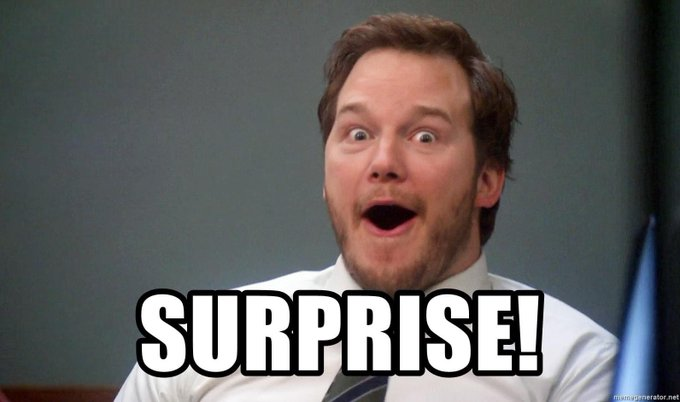

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [28]:
sample = pd.read_csv("data/sample_submission.csv")

In [29]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [30]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [31]:
submission = pd.DataFrame({
    'laptop_ID': test_df.index,  # Asegurándonos de que test_df.index contiene los ID de los laptops
    'Price_in_euros': predictions_submit  # Usar las predicciones almacenadas en predictions_submit
})

In [32]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [33]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Iván y Manuel: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `laptops_test.csv`. Lloramos.")

In [34]:
chequeador(submission)

You're ready to submit!


In [35]:
# Guardar el DataFrame como un archivo CSV para submission
submission.to_csv('submission_buena.csv', index=False)